## Trabajo Practico Fundamentos de ciencias de datos

### Librerias

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, model_selection, metrics, preprocessing, linear_model
from matplotlib import dates  # Importar 'dates' correctamente


### Importar el csv

#### Dataset elegido

Son datos históricos de acciones de bancos internacionales que obtengas desde yfinance. Este dataset incluirá variables numéricas relacionadas con precios y volumen de las acciones, además de información categórica (como el sector financiero), fechas (variable temporal), y variables geográficas (por ejemplo, la ubicación de la sede principal del banco o su país de operaciones).

#### Tickers seleccionados

- HSBC - HSBC Holdings plc (Reino Unido)

- BBVA - Banco Bilbao Vizcaya Argentaria, S.A. (España)

- SAN - Banco Santander, S.A. (España)

- BNS - Bank of Nova Scotia (Canadá)

- TD - Toronto-Dominion Bank (Canadá)

- DB - Deutsche Bank AG (Alemania)

- UBS - UBS Group AG (Suiza)

- ITUB - Itaú Unibanco Holding S.A. (Brasil)

- BBAS3.SA - Banco do Brasil S.A. (Brasil)

- WBC.AX - Westpac Banking Corporation (Australia)

- ANZ.AX - Australia and New Zealand Banking Group Limited (Australia)

- ICICIBANK.NS - ICICI Bank Limited (India)

- HDFCBANK.NS - HDFC Bank Limited (India)

- KB - KB Financial Group Inc. (Corea del Sur)

- SMFG - Sumitomo Mitsui Financial Group, Inc. (Japón)

- GGAL - Grupo Financiero Galicia S.A. (Argentina)

#### Origen

Datos extraídos de la API de yfinance, que proporciona datos históricos del mercado de valores.

Tipo de datos:

Numéricos: Precios de apertura, cierre, máximos y mínimos diarios, volumen de transacciones.

Categóricos: Nombre de la acción, sector del banco.

Temporales: Fechas de cada registro.

Geográficos: País de operación de cada banco (varía según la ubicación de cada banco).

Diccionario de Variables:

Date: Fecha del registro (temporal).

Ticker: Identificador del banco (categórico).

Open: Precio de apertura de la acción (numérico).

High: Precio más alto alcanzado en el día (numérico).

Low: Precio más bajo alcanzado en el día (numérico).

Close: Precio de cierre de la acción (numérico).

Volume: Volumen de transacciones de la acción (numérico).

Market Cap: Capitalización de mercado del banco (numérico).

Sector: Categoría que identifica el sector financiero al que pertenece el banco (categórico).

City: Ciudad donde se encuentra la sede principal del banco (geográfico).

Country: País de operación del banco (geográfico).


In [3]:
df=pd.read_csv('bank_tickers_data.csv')

### Limpieza de datos

#### Manipulación y Transformación del Dataset

Manejo de datos faltantes: Puede haber días sin transacciones, por lo que hay que  los manejar datos faltantes. Podemos optar por eliminar esos días o rellenarlos (por ejemplo, con el valor anterior, ya que por lo general si no hay transacciones puede ser por un feriado o dia que no abra el mercado).

Datos duplicados: Revisamos si hay filas duplicadas y las eliminamos, ya que es poco probable que se repitan todos los campos

Variables geográficas: La columna "Country" ya incluye la ubicación geográfica del banco, permitiendo análisis comparativos por región.

#### Valores nan y duplicados por banco

In [4]:
for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]
    nan_summary = bank_data.isna().sum()

    print(f"Valores NaN en {ticker}:\n{nan_summary}\n")

for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]
    duplicates_count = bank_data.duplicated().sum()

    print(f"Valores duplicados en {ticker}: {duplicates_count}\n")


Valores NaN en HSBC:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en BBVA:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en SAN:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en BNS:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en TD:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector     

#### Verificacion de valores unicos en sector, ciudad y pais

In [5]:
for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]

    sector_unique = bank_data['Sector'].unique()
    city_unique = bank_data['City'].unique()
    country_unique = bank_data['Country'].unique()

    print(f"{ticker} - Sector: {sector_unique}")
    print(f"{ticker} - City: {city_unique}")
    print(f"{ticker} - Country: {country_unique}\n")

HSBC - Sector: ['Financial Services']
HSBC - City: ['London']
HSBC - Country: ['United Kingdom']

BBVA - Sector: ['Financial Services']
BBVA - City: ['Bilbao']
BBVA - Country: ['Spain']

SAN - Sector: ['Financial Services']
SAN - City: ['Madrid']
SAN - Country: ['Spain']

BNS - Sector: ['Financial Services']
BNS - City: ['Toronto']
BNS - Country: ['Canada']

TD - Sector: ['Financial Services']
TD - City: ['Toronto']
TD - Country: ['Canada']

DB - Sector: ['Financial Services']
DB - City: ['Frankfurt am Main']
DB - Country: ['Germany']

UBS - Sector: ['Financial Services']
UBS - City: ['Zurich']
UBS - Country: ['Switzerland']

ITUB - Sector: ['Financial Services']
ITUB - City: ['São Paulo']
ITUB - Country: ['Brazil']

BBAS3.SA - Sector: ['Financial Services']
BBAS3.SA - City: ['Brasília']
BBAS3.SA - Country: ['Brazil']

WBC.AX - Sector: ['Financial Services']
WBC.AX - City: ['Sydney']
WBC.AX - Country: ['Australia']

ANZ.AX - Sector: ['Financial Services']
ANZ.AX - City: ['Melbourne']
A

### Estudio mensual del volumen

#### Volumen mensual de cada banco

/tmp/ipykernel_7242/3375208274.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume_df = df_volume.groupby([pd.Grouper(freq='M'), 'Ticker'])['Volume'].sum().reset_index()


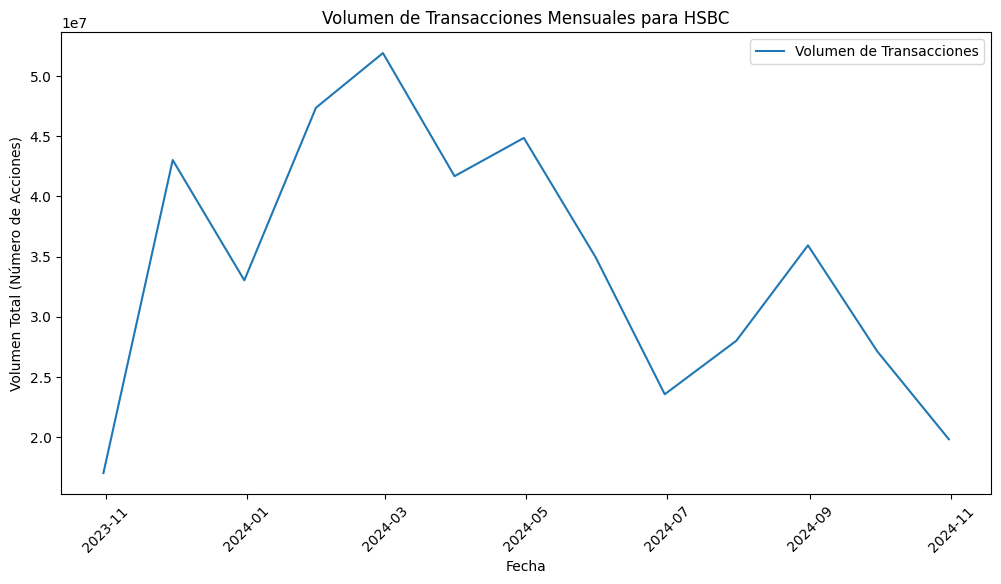

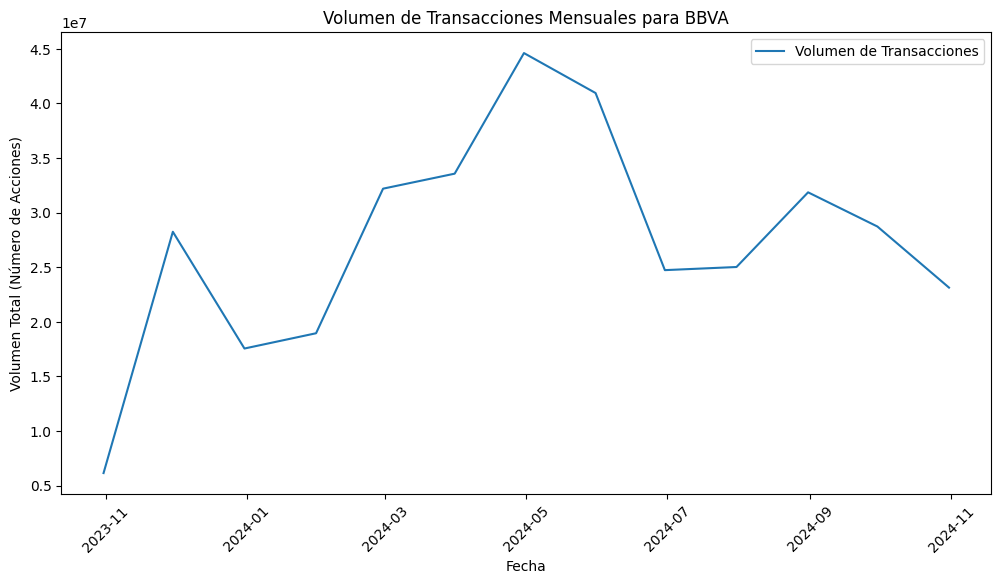

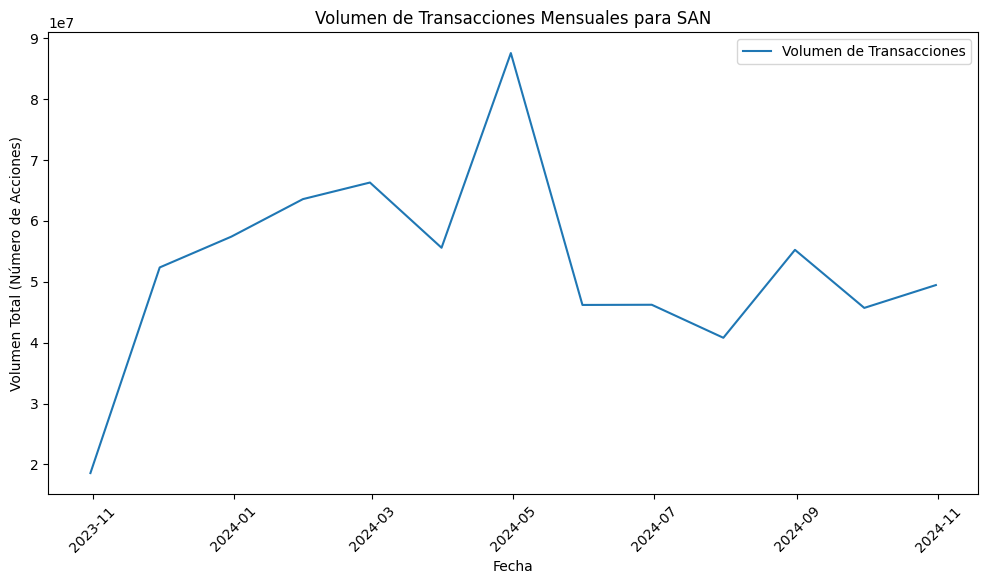

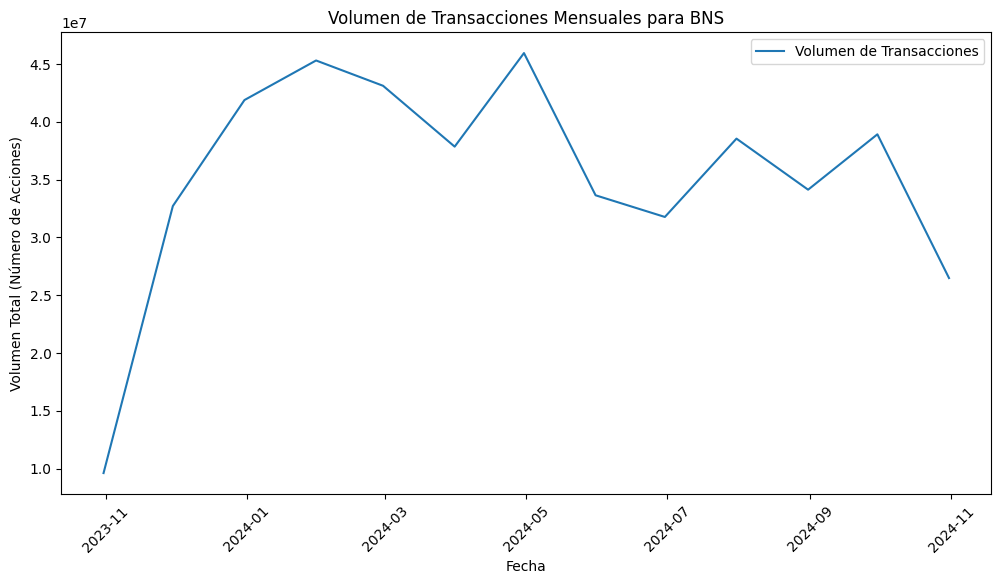

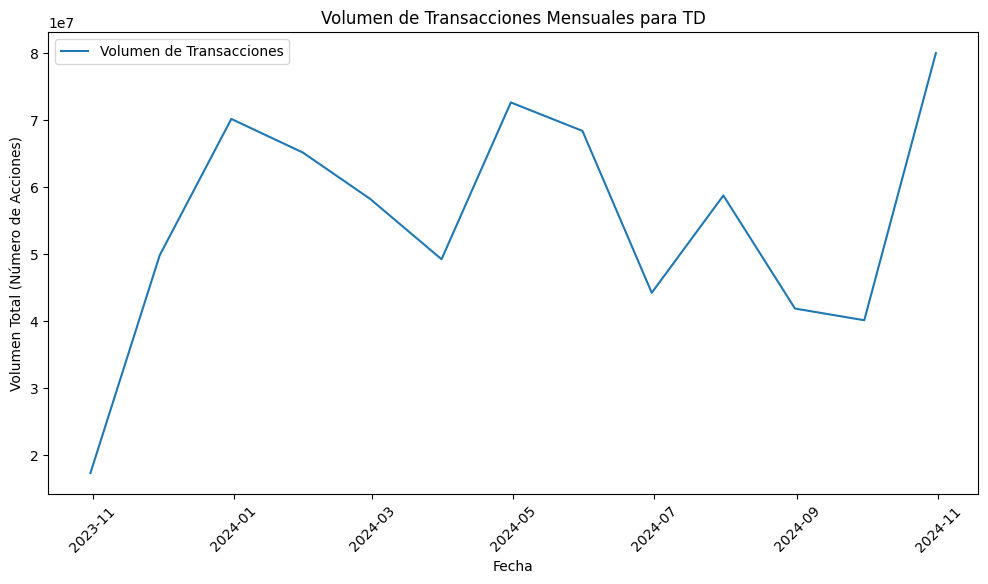

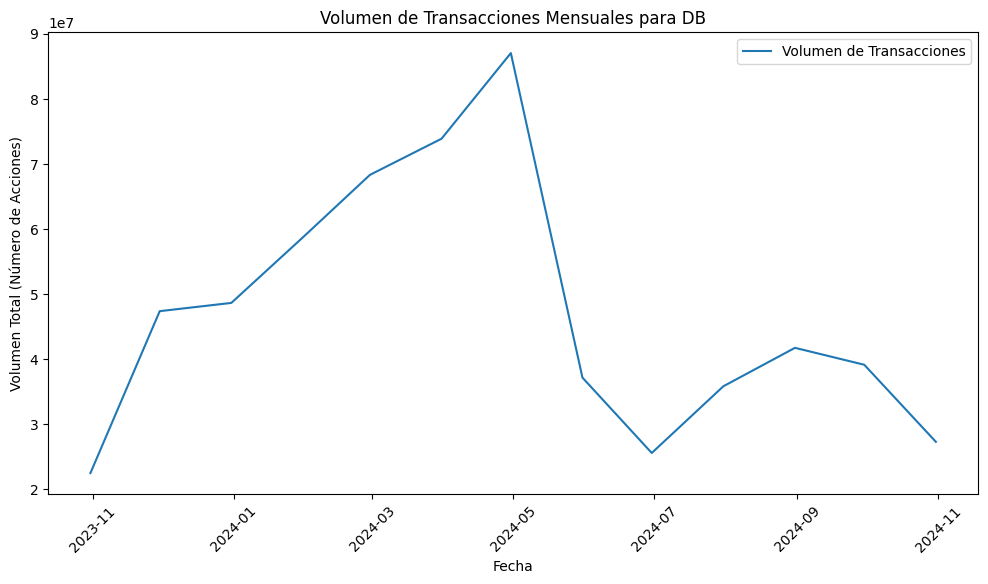

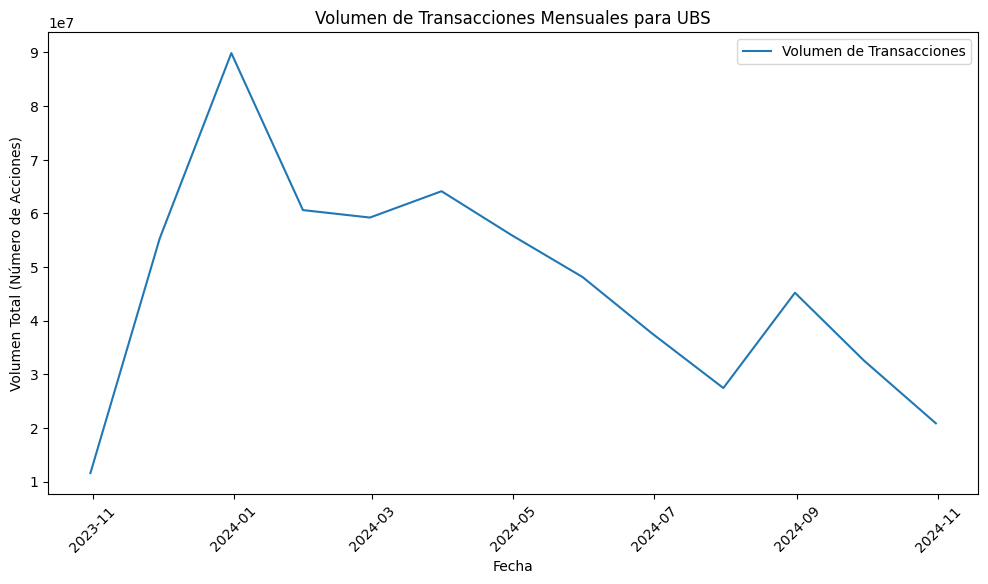

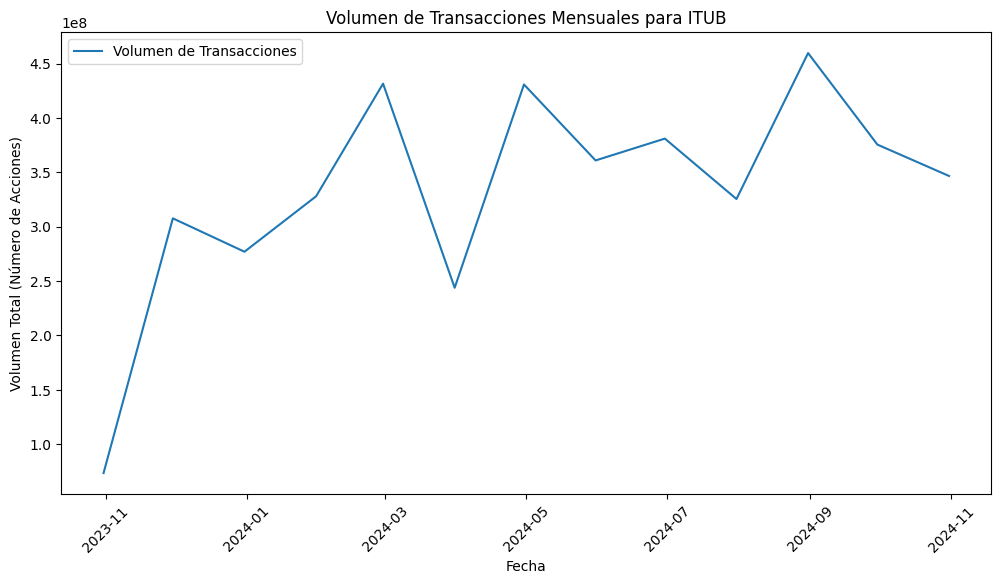

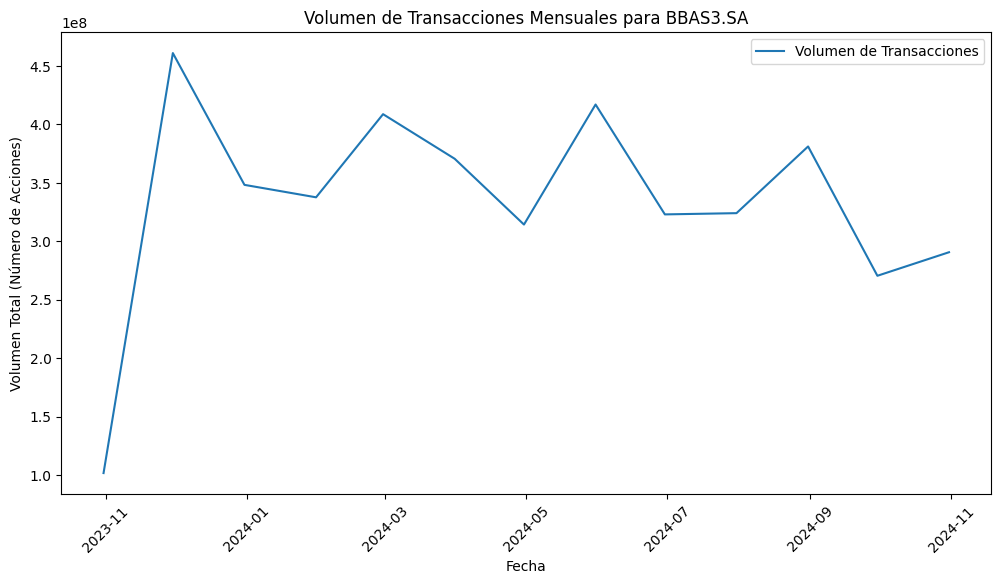

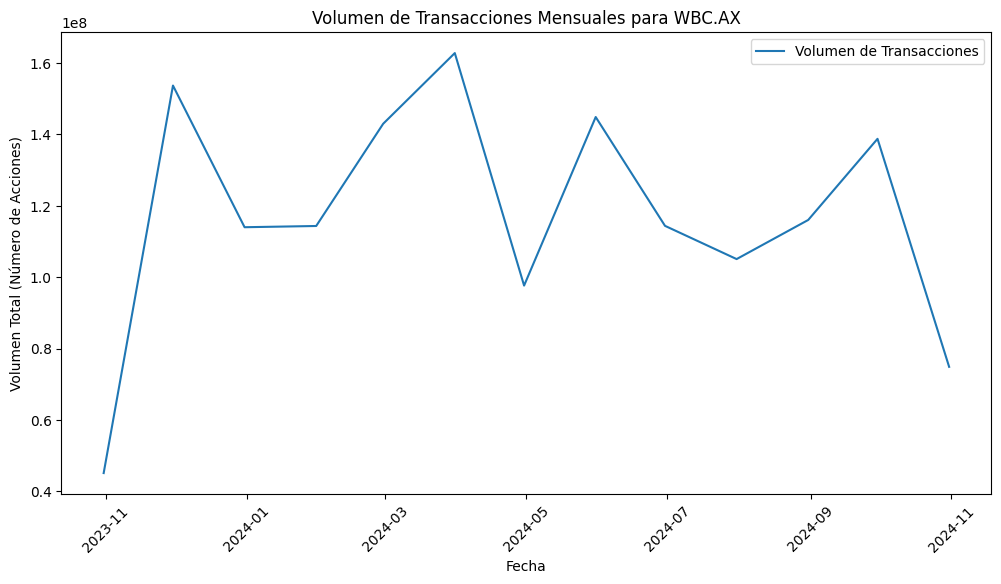

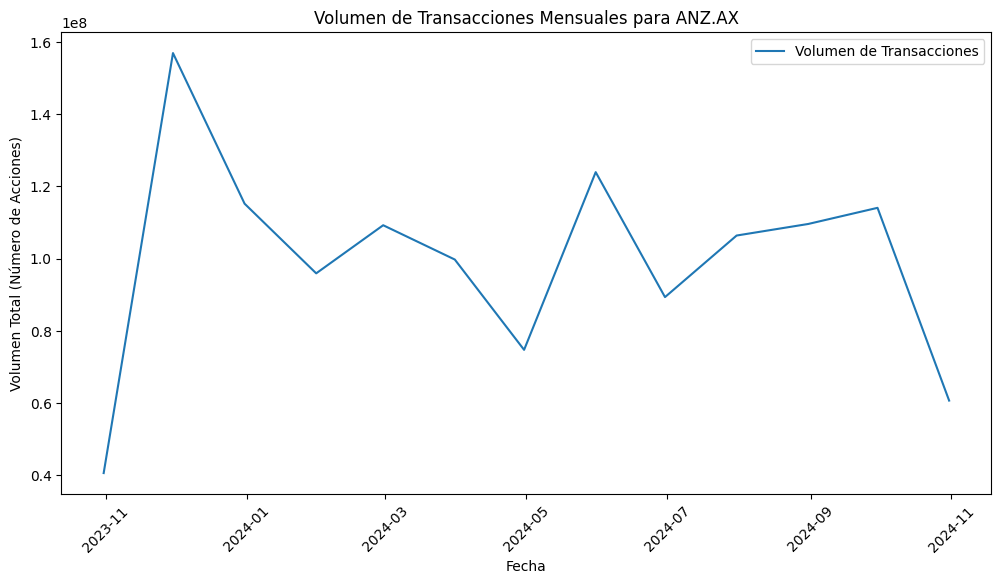

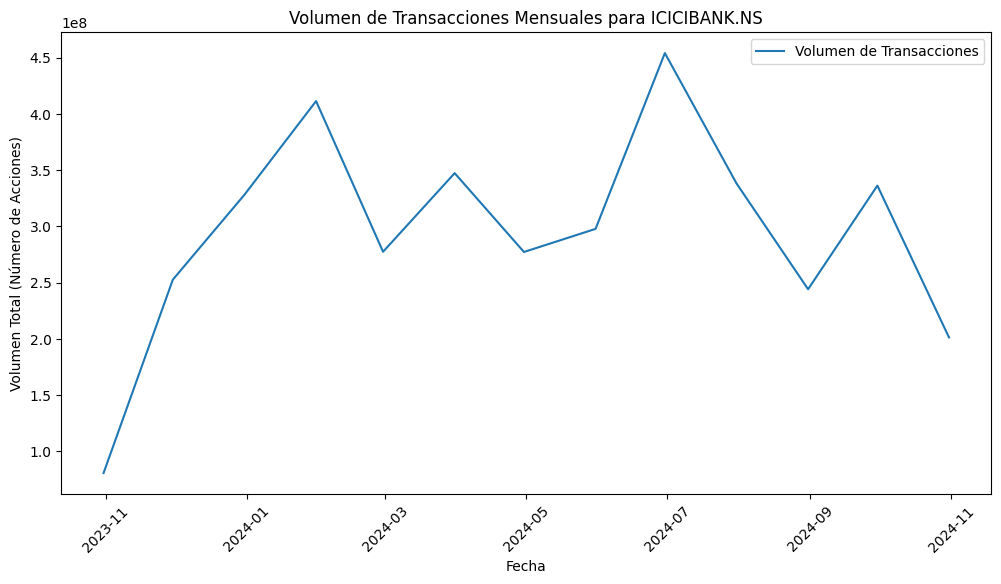

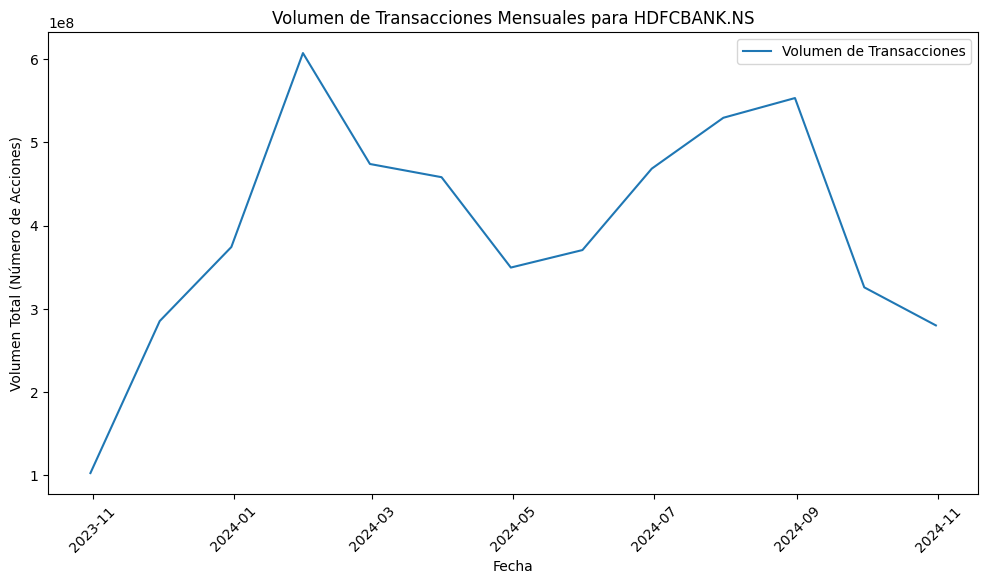

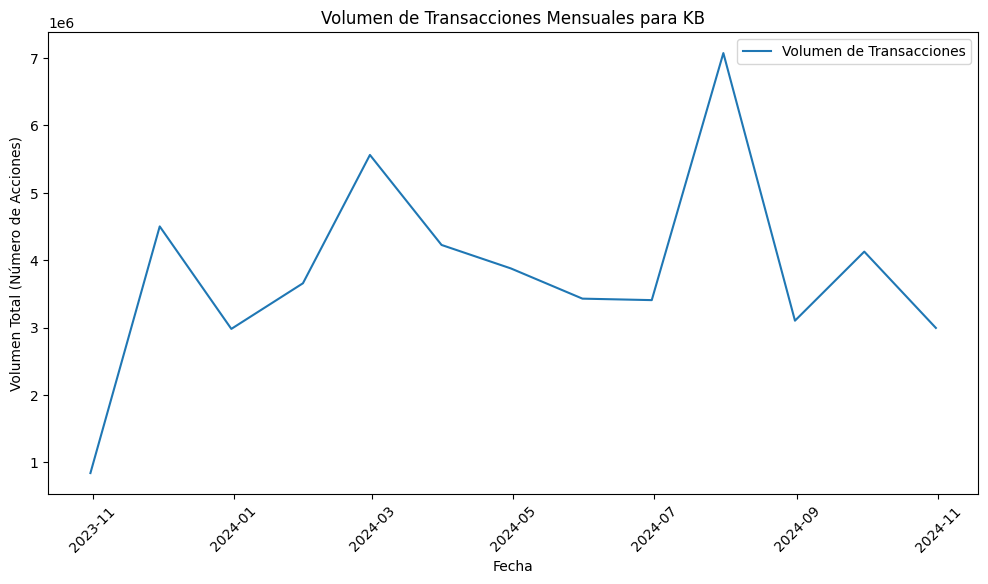

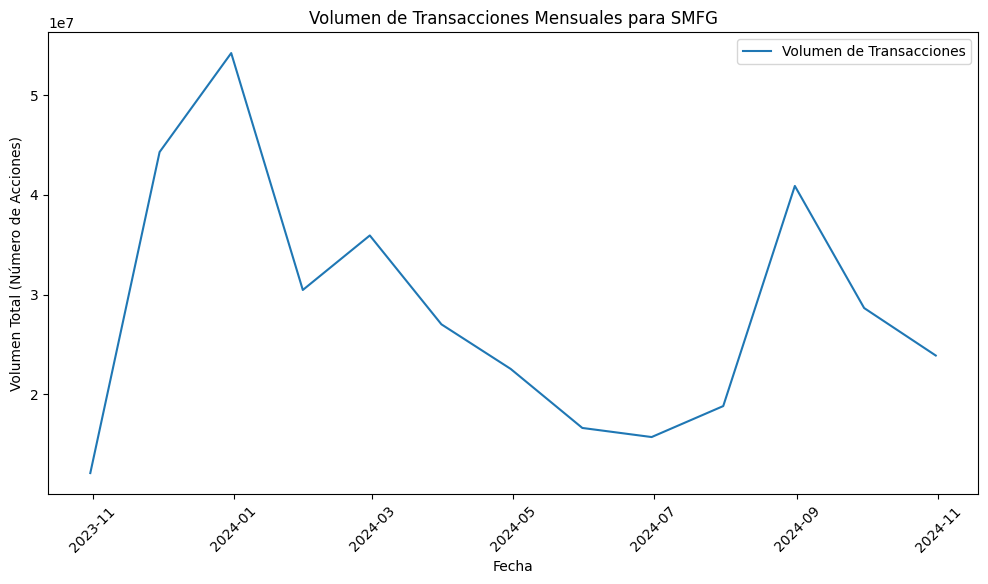

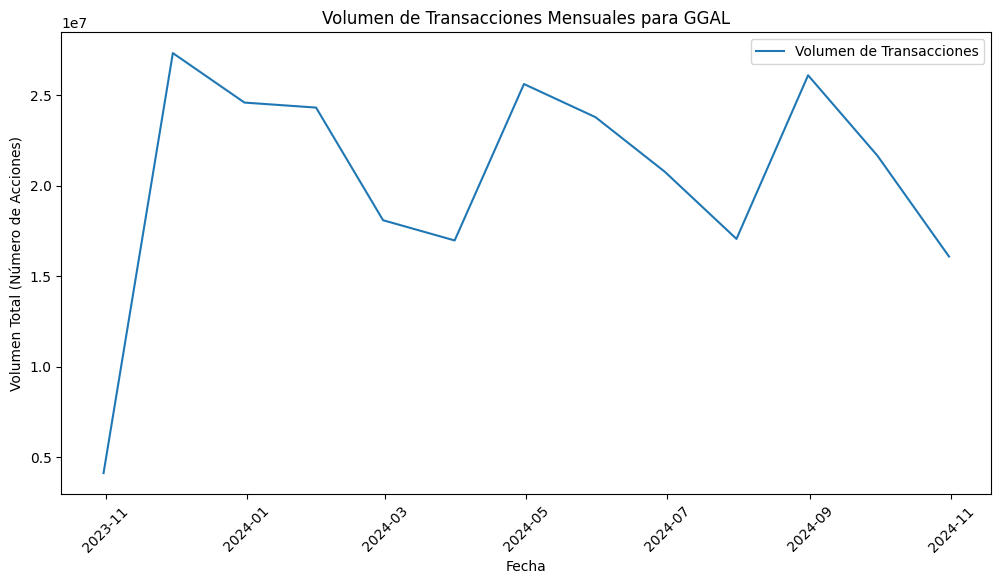

In [6]:
df_volume = df.copy()

# Convertir la columna 'Date' a datetime y ajustar a UTC
df_volume['Date'] = pd.to_datetime(df_volume['Date'], utc=True)

# Quitar la información de la zona horaria
df_volume['Date'] = df_volume['Date'].dt.tz_localize(None)

# Establecer 'Date' como índice del DataFrame
df_volume.set_index('Date', inplace=True)

# Agrupar por mes y ticker para calcular el volumen mensual
monthly_volume_df = df_volume.groupby([pd.Grouper(freq='M'), 'Ticker'])['Volume'].sum().reset_index()

# Graficar el volumen de transacciones mensual por ticker
for ticker in df_volume['Ticker'].unique():
    bank_data = monthly_volume_df[monthly_volume_df['Ticker'] == ticker]

    plt.figure(figsize=(12, 6))
    plt.plot(bank_data['Date'], bank_data['Volume'], label='Volumen de Transacciones')
    plt.title(f'Volumen de Transacciones Mensuales para {ticker}')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen Total (Número de Acciones)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

#### Volumen mensual con respecto al cierre de promedio mensual

/tmp/ipykernel_83728/1591416299.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume_df = df_volume_mean.groupby([pd.Grouper(freq='M'), 'Ticker']).agg({
/tmp/ipykernel_83728/1591416299.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data.sort_values('Date', inplace=True)
/tmp/ipykernel_83728/1591416299.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data.sort_values('Date', inplace=True)
/tmp/ipykernel_83728/1591416299.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

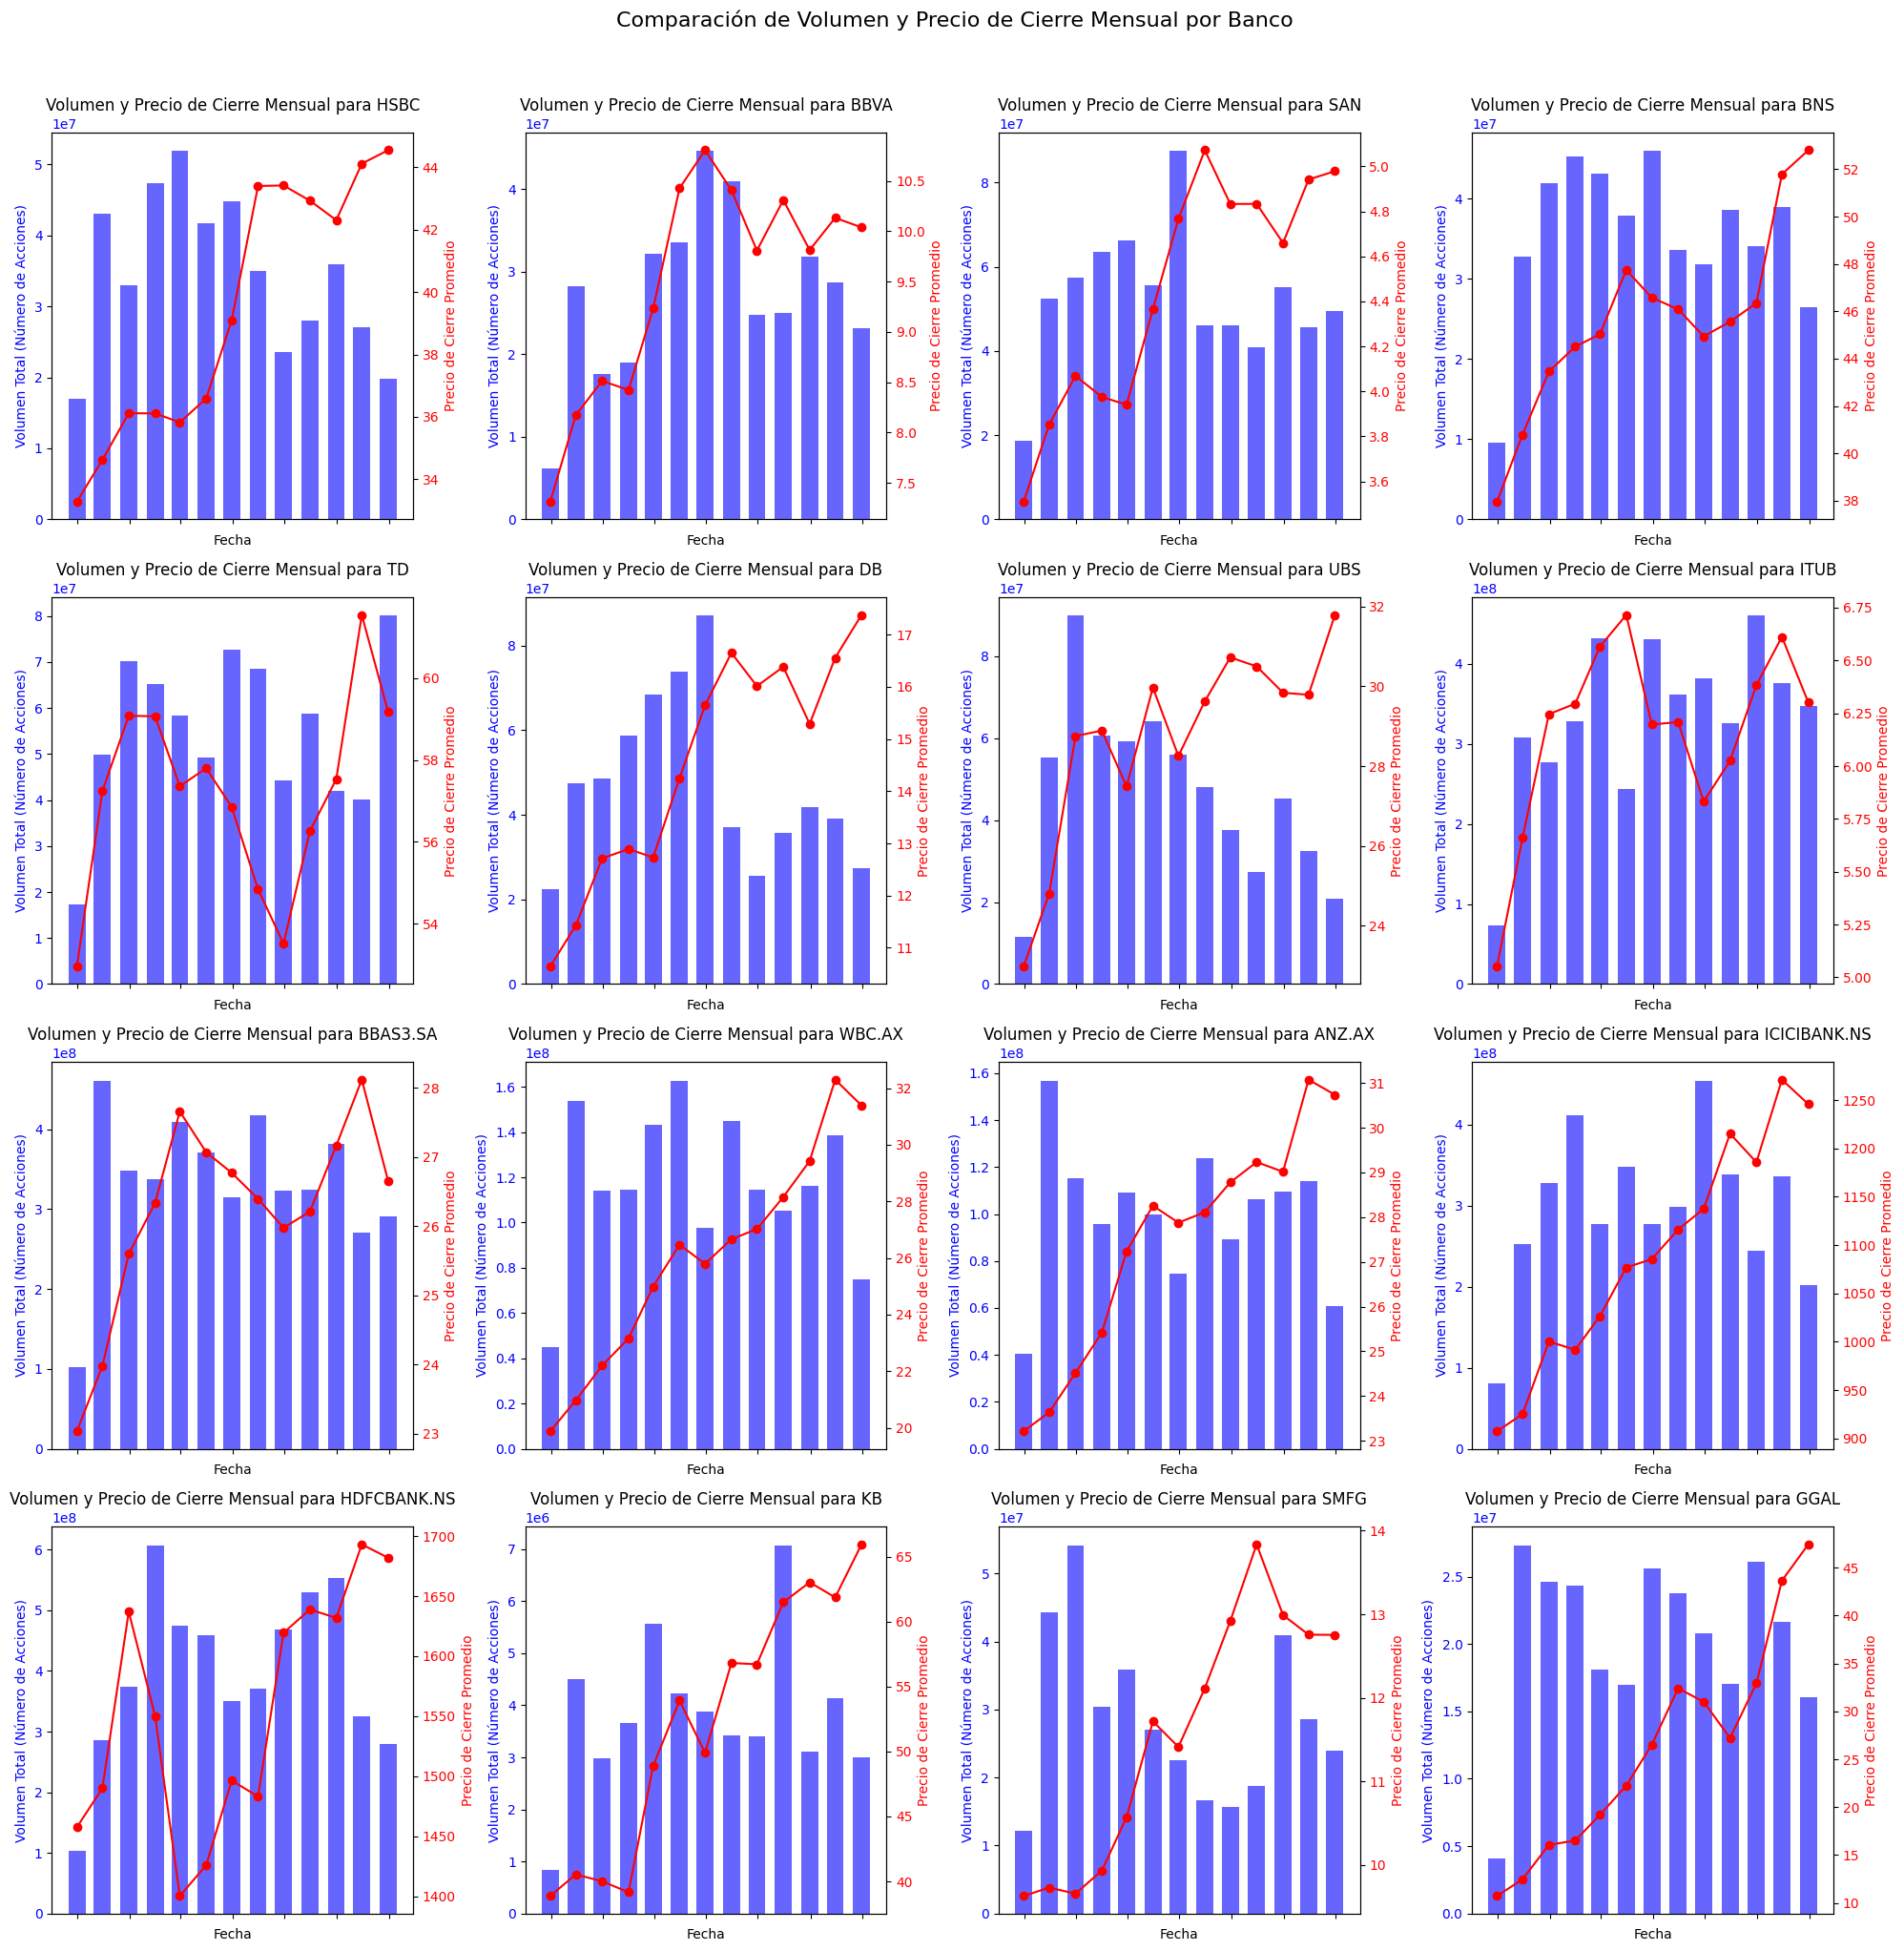

In [ ]:
# Crear una copia del DataFrame original para trabajar con el volumen
df_volume_mean = df.copy()

# Convertir la columna 'Date' a datetime y ajustar a UTC
df_volume_mean['Date'] = pd.to_datetime(df_volume_mean['Date'], utc=True)
df_volume_mean['Date'] = df_volume_mean['Date'].dt.tz_localize(None)

# Establecer 'Date' como el índice del DataFrame
df_volume_mean.set_index('Date', inplace=True)

# Agrupar por mes y ticker para calcular el volumen total y el precio de cierre promedio mensual
monthly_volume_df = df_volume_mean.groupby([pd.Grouper(freq='M'), 'Ticker']).agg({
    'Volume': 'sum',
    'Close': 'mean'
}).reset_index()

# Definir el número de tickers
tickers = df_volume_mean['Ticker'].unique()
num_tickers = len(tickers)

# Definir el número de columnas y filas para los subplots
ncols = 4
nrows = (num_tickers + ncols - 1) // ncols  # Calcula el número de filas necesarias

# Crear subplots para todos los tickers en una sola figura
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows), constrained_layout=True)

# Aplanar el array de ejes para facilitar la iteración
axs = axs.flatten()

# Graficar el volumen y el precio de cierre mensual por cada ticker
for i, ticker in enumerate(tickers):
    bank_data = monthly_volume_df[monthly_volume_df['Ticker'] == ticker]
    ax = axs[i]
    
    # Ordenar los datos por fecha para evitar desalineaciones
    bank_data.sort_values('Date', inplace=True)
    
    # Eje izquierdo: volumen de transacciones
    ax.bar(bank_data['Date'], bank_data['Volume'], width=20, color='b', alpha=0.6, align='center')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Volumen Total (Número de Acciones)', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    ax.set_title(f'Volumen y Precio de Cierre Mensual para {ticker}')

    # Formatear las etiquetas del eje x para mostrar solo mes y año
    ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
    # Rotar las etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    # Eje derecho: precio de cierre
    ax2 = ax.twinx()
    ax2.plot(bank_data['Date'], bank_data['Close'], color='r', marker='o')
    ax2.set_ylabel('Precio de Cierre Promedio', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Sincronizar los límites y ticks del eje x entre ambos ejes
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels([])  # Opcional: ocultar etiquetas duplicadas en ax2

# Eliminar subplots vacíos si los hay
for idx in range(num_tickers, nrows * ncols):
    fig.delaxes(axs[idx])

plt.suptitle('Comparación de Volumen y Precio de Cierre Mensual por Banco', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Comparacion de capitalizacion de mercado (Market cap)

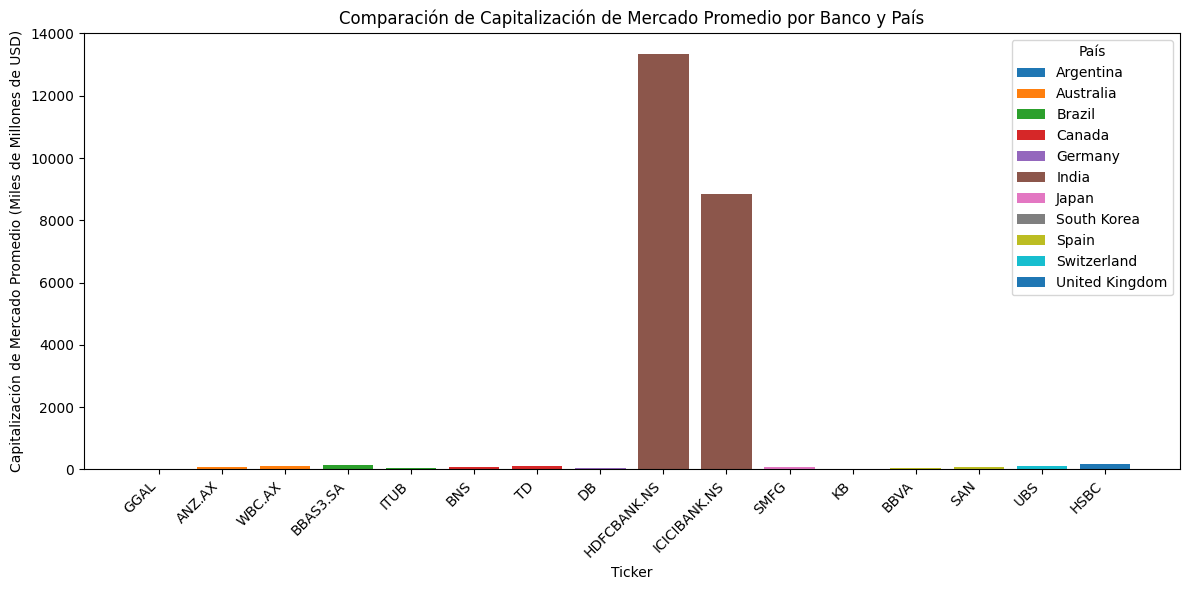

Capitalización de Mercado Promedio por Banco y País (en Miles de Millones de USD):
País: Argentina, Banco: GGAL, Capitalización de Mercado Promedio: 7.78 mil millones USD
País: Australia, Banco: ANZ.AX, Capitalización de Mercado Promedio: 94.59 mil millones USD
País: Australia, Banco: WBC.AX, Capitalización de Mercado Promedio: 111.39 mil millones USD
País: Brazil, Banco: BBAS3.SA, Capitalización de Mercado Promedio: 150.46 mil millones USD
País: Brazil, Banco: ITUB, Capitalización de Mercado Promedio: 56.99 mil millones USD
País: Canada, Banco: BNS, Capitalización de Mercado Promedio: 64.94 mil millones USD
País: Canada, Banco: TD, Capitalización de Mercado Promedio: 99.57 mil millones USD
País: Germany, Banco: DB, Capitalización de Mercado Promedio: 33.56 mil millones USD
País: India, Banco: HDFCBANK.NS, Capitalización de Mercado Promedio: 13351.18 mil millones USD
País: India, Banco: ICICIBANK.NS, Capitalización de Mercado Promedio: 8828.79 mil millones USD
País: Japan, Banco: SMFG,

In [61]:
# Crear una copia del DataFrame original para trabajar con la capitalización de mercado
df_market_cap = df.copy()

# Asegurarse de que la columna 'Market Cap' sea numérica
df_market_cap['Market Cap'] = pd.to_numeric(df_market_cap['Market Cap'], errors='coerce')

# Filtrar filas con valores válidos en 'Market Cap'
df_market_cap = df_market_cap[df_market_cap['Market Cap'].notna()]

# Convertir la capitalización de mercado a miles de millones de USD
df_market_cap['Market Cap'] = df_market_cap['Market Cap'] / 1e9

# Agrupar por país y calcular la capitalización de mercado promedio por banco
market_cap_by_country = df_market_cap.groupby(['Country', 'Ticker'])['Market Cap'].mean().reset_index()

# Graficar la capitalización de mercado promedio por banco en cada país
plt.figure(figsize=(12, 6))
for country in market_cap_by_country['Country'].unique():
    country_data = market_cap_by_country[market_cap_by_country['Country'] == country]
    plt.bar(country_data['Ticker'], country_data['Market Cap'], label=country)

plt.xlabel('Ticker')
plt.ylabel('Capitalización de Mercado Promedio (Miles de Millones de USD)')
plt.title('Comparación de Capitalización de Mercado Promedio por Banco y País')
plt.xticks(rotation=45, ha='right')
plt.legend(title='País')
plt.tight_layout()
plt.show()

# Mostrar los valores de la capitalización de mercado promedio por banco y país
print("Capitalización de Mercado Promedio por Banco y País (en Miles de Millones de USD):")
for index, row in market_cap_by_country.iterrows():
    print(f"País: {row['Country']}, Banco: {row['Ticker']}, Capitalización de Mercado Promedio: {row['Market Cap']:.2f} mil millones USD")

### Low & high comparison

/tmp/ipykernel_10739/2886300233.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


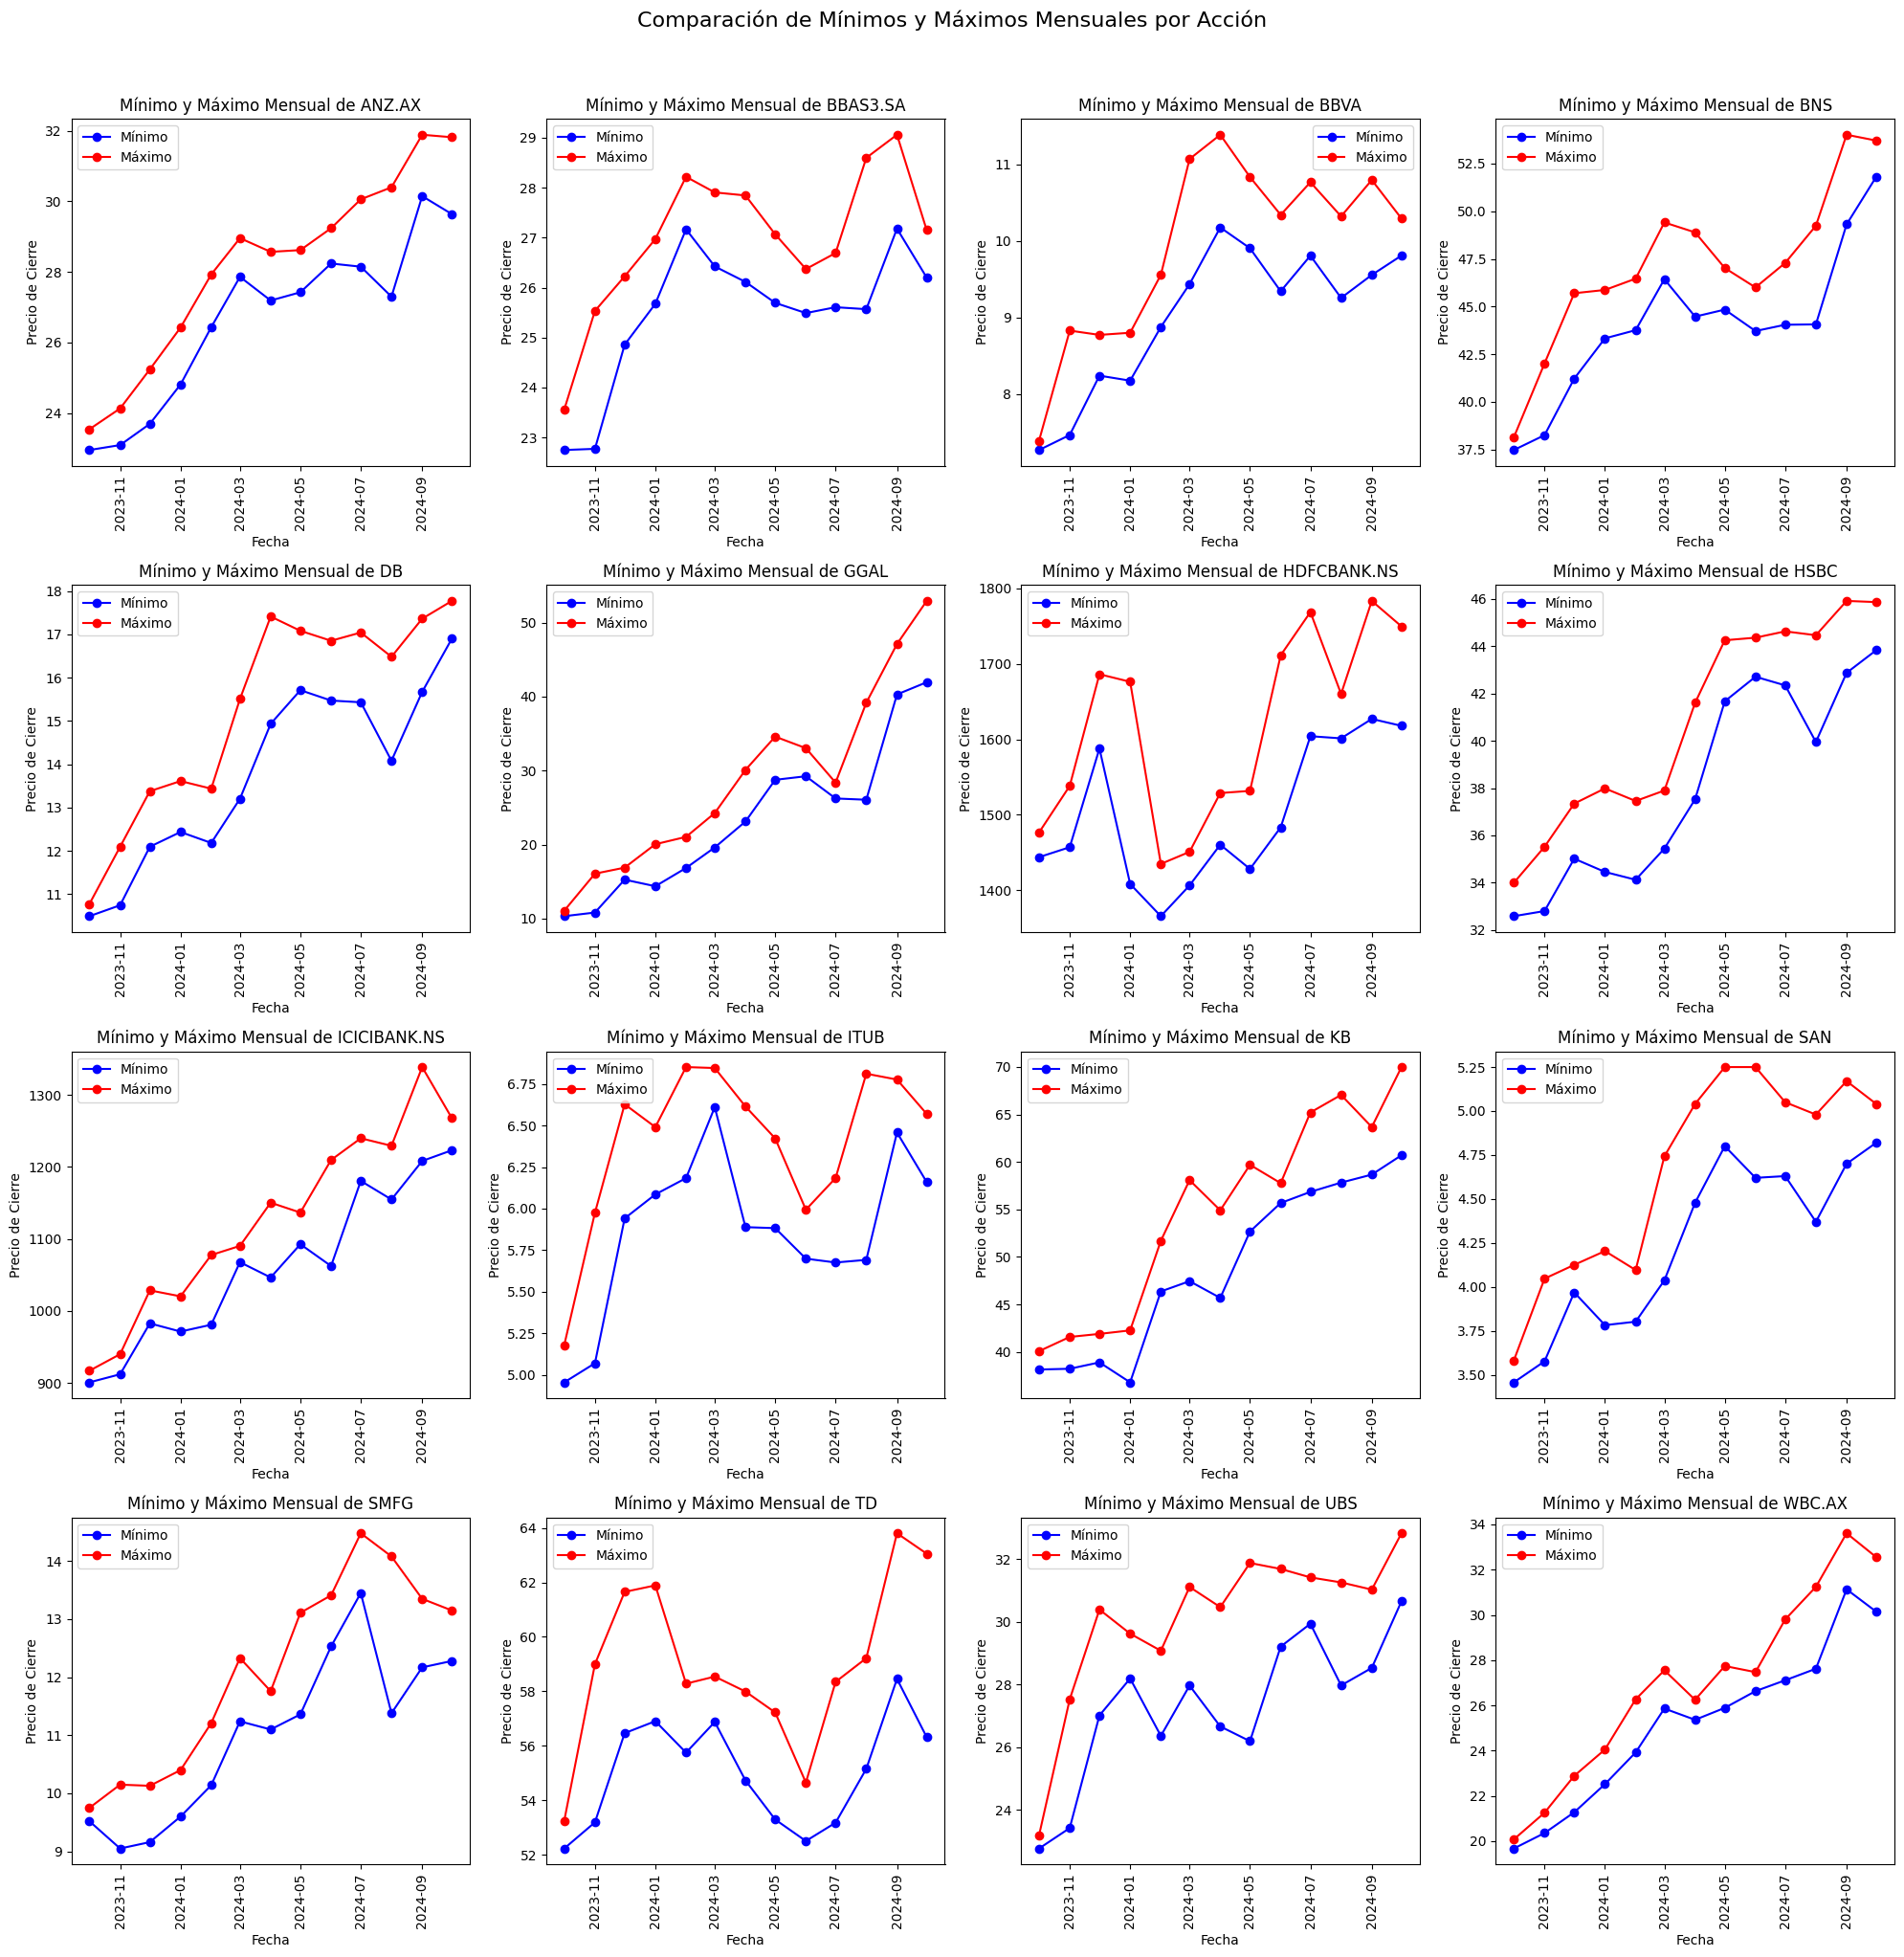

In [77]:
# Asegúrate de corregir o eliminar la línea incompleta antes de continuar
df_comparison = df.copy()

# Convertir la columna 'Date' a datetime y ajustar a UTC
df_comparison['Date'] = pd.to_datetime(df_comparison['Date'], errors='coerce', utc=True)
df_comparison['Date'] = df_comparison['Date'].dt.tz_localize(None)

# Eliminar filas con fechas nulas (por ejemplo, debido a errores de conversión)
df_comparison.dropna(subset=['Date'], inplace=True)

# Agregar columna de año y mes para facilitar el agrupamiento
df_comparison['YearMonth'] = df_comparison['Date'].dt.to_period('M')

# Agrupar por Ticker y YearMonth para calcular el mínimo y máximo mensual
monthly_min_max = df_comparison.groupby(['Ticker', 'YearMonth']).agg({
    'Close': ['min', 'max']
}).reset_index()

# Aplanar las columnas MultiIndex resultantes
monthly_min_max.columns = ['Ticker', 'YearMonth', 'MinClose', 'MaxClose']

# Convertir YearMonth de Period a Timestamp para graficar
monthly_min_max['YearMonth'] = monthly_min_max['YearMonth'].dt.to_timestamp()

# Obtener lista de tickers
tickers = monthly_min_max['Ticker'].unique()
num_tickers = len(tickers)

# Definir número de columnas y filas para los subplots
ncols = 4
nrows = (num_tickers + ncols - 1) // ncols  # Calcula el número de filas necesarias

# Crear subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows), constrained_layout=True)
axs = axs.flatten()

for i, ticker in enumerate(tickers):
    data = monthly_min_max[monthly_min_max['Ticker'] == ticker]
    ax = axs[i]
    
    # Graficar los mínimos y máximos
    ax.plot(data['YearMonth'], data['MinClose'], label='Mínimo', marker='o', color='b')
    ax.plot(data['YearMonth'], data['MaxClose'], label='Máximo', marker='o', color='r')
    
    # Formatear fechas en el eje x
    ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    ax.set_title(f'Mínimo y Máximo Mensual de {ticker}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend()

# Eliminar subplots vacíos
for idx in range(num_tickers, nrows * ncols):
    fig.delaxes(axs[idx])

plt.suptitle('Comparación de Mínimos y Máximos Mensuales por Acción', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Al describir la gráfica, es importante destacar cómo la visualización te ayuda a entender el comportamiento histórico de las acciones, identificar tendencias y volatilidades, y relacionar estos hallazgos con posibles factores externos. Esto proporciona un contexto valioso para análisis financieros y toma de decisiones estratégicas.

# Ideas

1. Variación de Precios (Close) por Banco y País

Analiza la variación diaria del precio de cierre de las acciones de los bancos de cada país.
Puedes usar gráficos de líneas para visualizar cómo cambian los precios de cierre a lo largo del tiempo para cada banco, segmentados por país.

2. Volumen de Operaciones

Compara el volumen promedio de operaciones para cada banco y país.
Esto te dará una idea de cuán líquidos son los mercados de cada país y cuánta atención están recibiendo las acciones de estos bancos.

3. Comparación de Capitalización de Mercado (Market Cap)

Analiza la capitalización de mercado de cada banco y agrúpalos por país.
Un gráfico de barras podría ayudar a visualizar las diferencias en la escala de los bancos, lo que podría reflejar el tamaño del banco y su influencia en el mercado financiero de su país.

4. Sectores y Países

Aunque la mayoría de los bancos estarán en el sector financiero, aún puedes explorar si hay diferencias en la subcategoría del sector en diferentes países (por ejemplo, bancos comerciales, bancos de inversión, etc.).

5. Distribución Geográfica

Puedes realizar un análisis de la distribución geográfica de los bancos utilizando las variables de país y ciudad.
Esto podría incluir un gráfico de barras o un mapa que muestre la representación de bancos por país.

6. Análisis de Volatilidad

Calcula la volatilidad diaria del precio de las acciones para cada banco (por ejemplo, usando la desviación estándar de las variaciones diarias del precio de cierre).
Puedes visualizar esta información en gráficos de barras, donde cada barra represente la volatilidad de un banco específico, segmentado por país.

7. Comparación de Crecimiento o Decrecimiento por País

Calcula el crecimiento porcentual total de cada acción durante el período analizado.
Puedes usar gráficos de barras para visualizar el crecimiento o decrecimiento porcentual por país, lo que puede reflejar el rendimiento relativo de los bancos en diferentes regiones.

8. Análisis del Precio de Apertura y Cierre

Analiza la diferencia entre los precios de apertura y cierre de las acciones para cada banco.
Esto puede mostrar si las acciones tienden a abrir y cerrar a precios similares o si hay fluctuaciones significativas durante el día.

9. Comparación de Volatilidad por País

Analiza si hay diferencias significativas en la volatilidad de los precios de las acciones entre países. Puedes calcular la volatilidad promedio por país y representarla en un gráfico de barras.

10. Relación entre Capitalización de Mercado y Volumen

Analiza si hay una correlación entre la capitalización de mercado de un banco y su volumen de operaciones. Esto podría indicarte si los bancos más grandes tienden a tener un mayor volumen de transacciones.
